# Predictive modeling  : DSC Donation Campaign

### Import libraries

In [51]:
import sys

from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
from scipy.stats            import pearsonr

### Path

In [52]:
sys.path.append("C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy")

In [53]:
directory = "C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy"
inputData = directory + "/Data"
sandbox   = directory + "/Sandbox"

In [54]:
# Import Train & Test
trainingSet = read_csv(inputData + "/training_DSC.csv")
validationSet = read_csv(inputData + "/Testing_DSC.csv")

In [55]:
# Feature selection thro' Pearson correlation 
selectedFeatures = []
target = "is_donation_year_GE_35"

for column in trainingSet.columns:
    if column not in ("donorID","is_donation_year_GE_35","Min_Amount_Donated",
                     "Max_Amount_Donated","min_donation_year", "max_donation_year",
                     "amount_campaign","is_camp_attended","Unnamed: 0"):                     
        (pearson,pvalue) = pearsonr(trainingSet[column],trainingSet[target])
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

is_donor_M - p-vlue = 0.15389789493452613 - selected : 0
is_donor_F - p-vlue = 0.15257467265893235 - selected : 0
is_donor_C - p-vlue = 0.006392781240661074 - selected : 0
is_donor_S - p-vlue = 0.01609912868781068 - selected : 0
is_donor_U - p-vlue = 0.003845058236265953 - selected : 0
is_donor_French - p-vlue = 0.01057626277481427 - selected : 0
Is_Brussel - p-vlue = 0.08440014846470607 - selected : 0
Is_Walloon - p-vlue = 0.04023115927892577 - selected : 0
Is_FlemishBrabant - p-vlue = 0.7818413568932882 - selected : 0
Is_Antwerp - p-vlue = 0.8277011726070991 - selected : 0
Is_FlemishBrabant2 - p-vlue = 0.03578471729486139 - selected : 0
Is_Limburg - p-vlue = 0.05347815566181581 - selected : 0
Is_Liège - p-vlue = 0.6127670118316595 - selected : 0
Is_Namur - p-vlue = 0.8264058256575337 - selected : 0
Is_Hainaut - p-vlue = 0.7987130510882726 - selected : 0
Is_Luxembourg - p-vlue = 0.8472620567949699 - selected : 0
Is_Hainaut2 - p-vlue = 0.10770132926898486 - selected : 0
Is_WestFlanders

In [56]:
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 10000)
randomForest = RandomForestClassifier(n_estimators = 500)
boostedTree  = GradientBoostingClassifier()
svm          = SVC(gamma = "scale", probability = True)
neuralNet    = MLPClassifier()
neighbors    = KNeighborsClassifier()

In [57]:
models = {"tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet,
          "neighbors"    :neighbors
         }

In [58]:
trainingSet.head()

,Unnamed: 0,donorID,amount_campaign,is_donor_M,is_donor_F,is_donor_C,is_donor_S,is_donor_U,is_donor_French,Is_Brussel,...,min_donation_year,Max_Amount_Donated,Min_Amount_Donated,First_Amount_Donated,Last_Amount_Donated,Years_from_first_donation,Years_from_last_donation,is_donation_year_GE_35,is_donation_year_GE_60,is_donation_year_GE_100
0,0,100001,0.0,1,0,0,0,0,0,0,...,10.00,30.00,30.00,12.39,10.0,15.0,7.0,0,0,0
1,1,100002,0.0,1,0,0,0,0,1,0,...,20.00,20.00,20.00,20.00,20.0,3.0,3.0,0,0,0
2,2,100004,0.0,1,0,0,0,0,0,1,...,49.58,49.58,49.58,24.79,30.0,18.0,8.0,0,0,0
3,3,100008,0.0,1,0,0,0,0,0,0,...,24.79,50.00,50.00,49.58,50.0,15.0,7.0,0,0,0
4,4,100009,0.0,0,1,0,0,0,0,1,...,7.44,25.00,25.00,12.39,20.0,17.0,6.0,0,0,0


In [59]:
#Initiating the models
for model in models:
    models[model].fit(trainingSet[selectedFeatures],trainingSet[target])
    print(f"{model} has been trained successfully")

tree has been trained successfully
logistic has been trained successfully
randomForest has been trained successfully
boostedTree has been trained successfully
svm has been trained successfully
neuralNet has been trained successfully
neighbors has been trained successfully


In [60]:
performances_training = {}

for model in models:
    predictions   = models[model].predict(trainingSet[selectedFeatures])
    probabilities = DataFrame(models[model].predict_proba(trainingSet[selectedFeatures]))[1]
    accuracy      = accuracy_score(trainingSet[target],predictions)
    auc           = roc_auc_score(array(trainingSet[target]),array(probabilities))
    
    performances_training[model] = {"Accuracy":accuracy,"AUC":auc}

In [61]:
DataFrame(performances_training)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
AUC,0.950244,0.614828,0.940515,0.750738,0.668491,0.667724,0.779691
Accuracy,0.991487,0.986270,0.991487,0.987016,0.985181,0.986184,0.985152


In [62]:
performances = {}

for model in models:
    predictions   = models[model].predict(validationSet[selectedFeatures])
    probabilities = DataFrame(models[model].predict_proba(validationSet[selectedFeatures]))[1]
    accuracy      = accuracy_score(validationSet[target],predictions)
    auc           = roc_auc_score(array(validationSet[target]),array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

In [63]:
DataFrame(performances)

,tree,logistic,randomForest,boostedTree,svm,neuralNet,neighbors
AUC,0.553102,0.589361,0.600563,0.683009,0.647764,0.653741,0.527653
Accuracy,0.990719,0.994463,0.993566,0.994346,0.994073,0.994424,0.994034


### Lifts & Gains

In [64]:
#Import 
from ieseg import roc
from ieseg import lift
from ieseg import cumulativeResponse
from ieseg import cumulativeGains

In [65]:
lifts     = {}
responses = {}
gains     = {}
data      = DataFrame(validationSet[["donorID",target]]).copy() 

for (index,model) in enumerate(models):
    data[f"proba {model}"] = DataFrame(models[model].predict_proba(validationSet[selectedFeatures]))[1]
    lifts[model] = lift(dataSet = data, actuals = "is_donation_year_GE_35", probability = "proba "+str(model))
    responses[model] = cumulativeResponse(dataSet = data, actuals = "is_donation_year_GE_35", probability = "proba "+str(model))
    gains[model] = cumulativeGains(dataSet = data, actuals = "is_donation_year_GE_35", probability = "proba "+str(model))

C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Bin"] = 0
C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Bin"] = 0
C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy\ieseg.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Quantile"] = internalSet[probability + "_bin"] / precision
C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Bin"] = 0
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy\ieseg.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["Quantile"] = internalSet[probability + "_bin"] / precision
C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy\ieseg.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  internalSet["obs"]      = 1
C:/Users/dkalapati/Desktop/predictive and descriptive/casestudy\ieseg.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

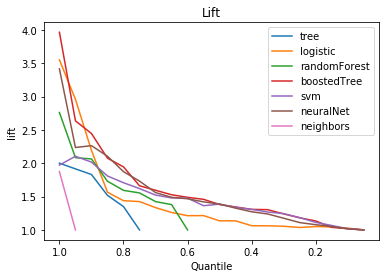

In [66]:
for model in models:
    pyplot.plot(lifts[model]["Quantile"], lifts[model]["Lift"], label = models)
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("lift")
    pyplot.title("Lift")
    pyplot.legend(lifts)

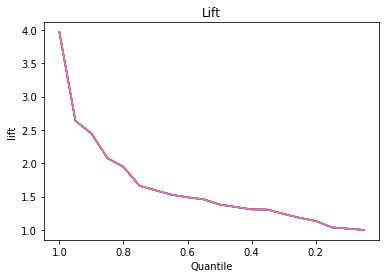

In [67]:
for model in models:
    pyplot.plot(lifts["boostedTree"]["Quantile"], lifts["boostedTree"]["Lift"])
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("lift")
    pyplot.title("Lift")

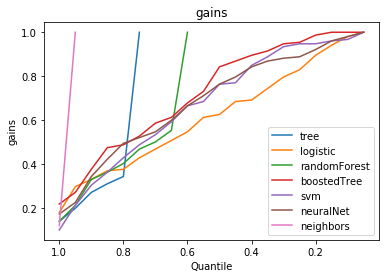

In [68]:
for model in models:
    pyplot.plot(gains[model]["Quantile"], gains[model]["Cumulative gains"])
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("gains")
    pyplot.title("gains")
    pyplot.legend(gains)

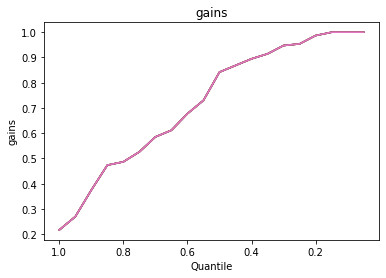

In [69]:
for model in models:
    pyplot.plot(gains["boostedTree"]["Quantile"], gains["boostedTree"]["Cumulative gains"])
    pyplot.gca().invert_xaxis()
    pyplot.xlabel("Quantile")
    pyplot.ylabel("gains")
    pyplot.title("gains")

In [70]:
probabilities = ['proba tree', 'proba logistic','proba randomForest', 'proba boostedTree', 'proba svm','proba neuralNet', 'proba neighbors']

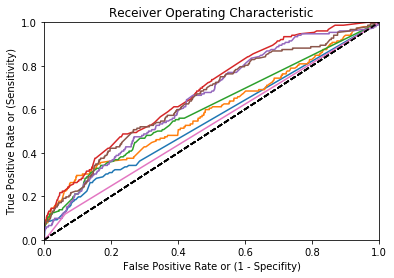

In [72]:
for i in data[probabilities]:
    rocTest = roc(dataSet = data, actuals = target, probability = i)
    pyplot.plot(rocTest["False positive rate"], rocTest["True positive rate"])
    pyplot.plot([0, 1], [0, 1], 'k--')
    pyplot.xlim([0.0, 1.0])
    pyplot.ylim([0.0, 1.0])
    pyplot.xlabel("False Positive Rate or (1 - Specifity)")
    pyplot.ylabel("True Positive Rate or (Sensitivity)")
    pyplot.title("Receiver Operating Characteristic")

In [73]:
rocTest_bt = roc(dataSet = data, actuals = target, probability = 'proba boostedTree')

Text(0.5, 1.0, 'Receiver Operating Characteristic')

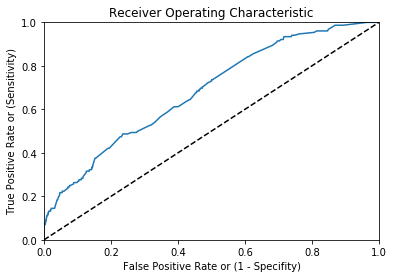

In [74]:

    pyplot.plot(rocTest_bt["False positive rate"], rocTest_bt["True positive rate"])
    pyplot.plot([0, 1], [0, 1], 'k--')
    pyplot.xlim([0.0, 1.0])
    pyplot.ylim([0.0, 1.0])
    pyplot.xlabel("False Positive Rate or (1 - Specifity)")
    pyplot.ylabel("True Positive Rate or (Sensitivity)")
    pyplot.title("Receiver Operating Characteristic")

### Result

In [75]:
final_csv = data[['donorID','is_donation_year_GE_35','proba boostedTree']]

In [78]:
final_csv.to_csv('probabilities.csv')